# Libraries import

In [2]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
import seaborn as sns 
import statsmodels.api as sm
import datetime as dt
from sklearn import preprocessing
from sklearn.cluster import KMeans
import statsmodels.api as sm
from sklearn.cluster import DBSCAN
from scipy.stats import probplot
from sklearn.neighbors import NearestNeighbors
from sklearn import metrics
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc
import datetime 
%matplotlib inline

In [3]:
# Loading challenge file and deleting unnecessary columns

data = pd.read_csv("db_growth_case.csv")
data = data.drop(['z_costcontact','z_revenue'], axis=1)

pd.options.display.max_columns = data.shape[1]+10
data.head()

,id,year_birth,education,marital_status,income,kidhome,teenhome,dt_customer,recency,mntwines,mntfruits,mntmeatproducts,mntfishproducts,mntsweetproducts,mntgoldprods,numdealspurchases,numwebpurchases,numcatalogpurchases,numstorepurchases,numwebvisitsmonth,acceptedcmp3,acceptedcmp4,acceptedcmp5,acceptedcmp1,acceptedcmp2,complain,response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0


In [4]:
data.describe()

,id,year_birth,income,kidhome,teenhome,recency,mntwines,mntfruits,mntmeatproducts,mntfishproducts,mntsweetproducts,mntgoldprods,numdealspurchases,numwebpurchases,numcatalogpurchases,numstorepurchases,numwebvisitsmonth,acceptedcmp3,acceptedcmp4,acceptedcmp5,acceptedcmp1,acceptedcmp2,complain,response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
# Merging the rows of Marital Status
data['marital_status'] = data['marital_status'].replace(["Alone","YOLO","Absurd"],"Single")
print(data['marital_status'].unique())

['Single' 'Together' 'Married' 'Divorced' 'Widow']


In [6]:
# Merging the rows of education variable:
data['education'] = data['education'].replace(["2n Cycle","Master"],"Masters")
print(data['education'].unique())

['Graduation' 'PhD' 'Masters' 'Basic']


In [7]:
data["dt_customer"] = pd.to_datetime(data["dt_customer"])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   id                   2240 non-null   int64         
 1   year_birth           2240 non-null   int64         
 2   education            2240 non-null   object        
 3   marital_status       2240 non-null   object        
 4   income               2216 non-null   float64       
 5   kidhome              2240 non-null   int64         
 6   teenhome             2240 non-null   int64         
 7   dt_customer          2240 non-null   datetime64[ns]
 8   recency              2240 non-null   int64         
 9   mntwines             2240 non-null   int64         
 10  mntfruits            2240 non-null   int64         
 11  mntmeatproducts      2240 non-null   int64         
 12  mntfishproducts      2240 non-null   int64         
 13  mntsweetproducts     2240 non-nul

In [8]:
# Summing up products bought
data['expenditure'] = data['mntwines'] + data['mntsweetproducts'] + data['mntmeatproducts'] + data['mntgoldprods'] + data['mntfruits'] + data['mntfishproducts']


In [9]:
# Getting customers' current age.
current_datetime = datetime.datetime.now()

data['age'] = current_datetime.year - data['year_birth']
data['age'].describe()

count    2240.000000
mean       54.194196
std        11.984069
min        27.000000
25%        46.000000
50%        53.000000
75%        64.000000
max       130.000000
Name: age, dtype: float64

In [10]:
cat_count = 0
num_count = 0
for i in data.dtypes:
    if i == 'object':
        cat_count = cat_count + 1
    else:
        num_count = num_count + 1

print("The Number of Numerical variables :",num_count)
print("The Number of qualitative variables:",cat_count)

The Number of Numerical variables : 27
The Number of qualitative variables: 2


In [11]:
# Checking if we need to fix null values before running ML Models
data.isnull().sum()

id                      0
year_birth              0
education               0
marital_status          0
income                 24
kidhome                 0
teenhome                0
dt_customer             0
recency                 0
mntwines                0
mntfruits               0
mntmeatproducts         0
mntfishproducts         0
mntsweetproducts        0
mntgoldprods            0
numdealspurchases       0
numwebpurchases         0
numcatalogpurchases     0
numstorepurchases       0
numwebvisitsmonth       0
acceptedcmp3            0
acceptedcmp4            0
acceptedcmp5            0
acceptedcmp1            0
acceptedcmp2            0
complain                0
response                0
expenditure             0
age                     0
dtype: int64

### Imputing missing values based on average of Marital_Status and Education groups

In [12]:
data_group = data.groupby(['marital_status', 'education']).aggregate({'income': 'median'})
data_group

income
marital_status education          
Divorced       Basic        9548.0
               Graduation  55635.0
               Masters     49297.0
               PhD         50613.5
Married        Basic       22352.0
               Graduation  50737.0
               Masters     50017.0
               PhD         57081.5
Single         Basic       16383.0
               Graduation  49973.5
               Masters     49514.0
               PhD         48918.0
Together       Basic       23179.0
               Graduation  53977.0
               Masters     47586.5
               PhD         56756.0
Widow          Basic       22123.0
               Graduation  58275.0
               Masters     51459.5
               PhD         57032.0

In [13]:
# function to calculate the income based on education and marital status
def calculate_income(row):
    if pd.isnull(row['income']):
        if row['marital_status'] == 'Divorced':
            if row['education'] == "Basic":
                return 9548.0
            elif row['education'] == "Graduation":
                return 55635.0
            elif row['education'] == "Masters":
                return 49297.0
            elif row['education'] == "PhD":
                return 50613.5
        elif row['marital_status'] == 'Married':
            if row['education'] == "Basic":
                return 22352.0
            elif row['education'] == "Graduation":
                return 50737.0
            elif row['education'] == "Masters":
                return 50017.0
            elif row['education'] == "PhD":
                return 57081.5
        elif row['marital_status'] == 'Single':
            if row['education'] == "Basic":
                return 16383.0
            elif row['education'] == "Graduation":
                return 49973.5
            elif row['education'] == "Masters":
                return 49514.0
            elif row['education'] == "PhD":
                return 48918.0
        elif row['marital_status'] == 'Together':
            if row['education'] == "Basic":
                return 23179.0
            elif row['education'] == "Graduation":
                return 53977.0
            elif row['education'] == "Masters":
                return 47586.5
            elif row['education'] == "PhD":
                return 56756.0
        elif row['marital_status'] == 'Widow':
            if row['education'] == "Basic":
                return 22123.0
            elif row['education'] == "Graduation":
                return 58275.0
            elif row['education'] == "Masters":
                return 51459.5
            elif row['education'] == "PhD":
                return 57032.0
    return row['income']

# Apply the function to the 'income' column
data['income'] = data.apply(calculate_income, axis=1)
data.isnull().sum()

id                     0
year_birth             0
education              0
marital_status         0
income                 0
kidhome                0
teenhome               0
dt_customer            0
recency                0
mntwines               0
mntfruits              0
mntmeatproducts        0
mntfishproducts        0
mntsweetproducts       0
mntgoldprods           0
numdealspurchases      0
numwebpurchases        0
numcatalogpurchases    0
numstorepurchases      0
numwebvisitsmonth      0
acceptedcmp3           0
acceptedcmp4           0
acceptedcmp5           0
acceptedcmp1           0
acceptedcmp2           0
complain               0
response               0
expenditure            0
age                    0
dtype: int64

### Analyzing continuous variables distributions

In [14]:
data_continuous = data[['income', 'mntwines', 'mntfruits',
       'mntmeatproducts', 'mntfishproducts', 'mntsweetproducts',
       'mntgoldprods', 'age', 'expenditure']]
data_continuous.head()


,income,mntwines,mntfruits,mntmeatproducts,mntfishproducts,mntsweetproducts,mntgoldprods,age,expenditure
0,58138.0,635,88,546,172,88,88,66,1617
1,46344.0,11,1,6,2,1,6,69,27
2,71613.0,426,49,127,111,21,42,58,776
3,26646.0,11,4,20,10,3,5,39,53
4,58293.0,173,43,118,46,27,15,42,422


<Figure size 1000x500 with 0 Axes>

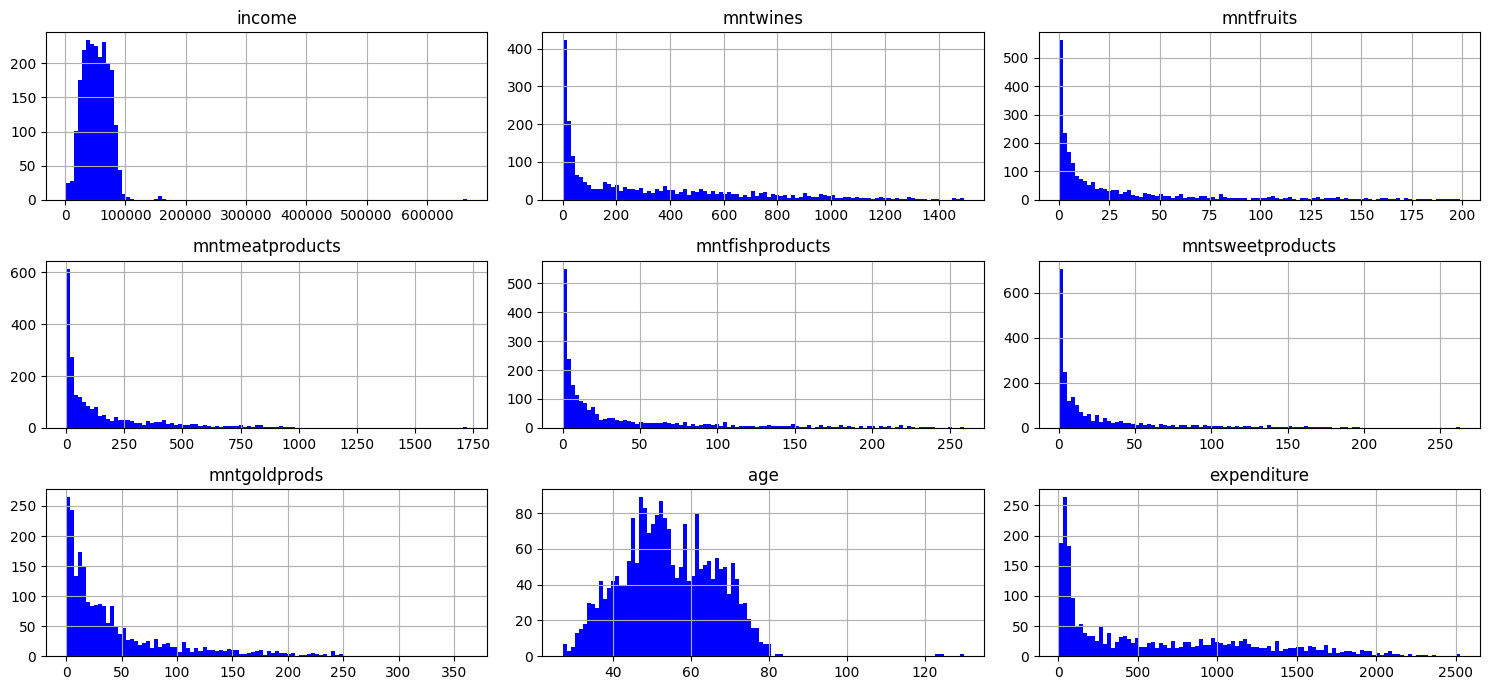

In [15]:
plt.figure(figsize = (10,5))
data_continuous.hist(figsize = (15,7), color = "blue", bins = 100)
plt.tight_layout()

### Outlier detectors

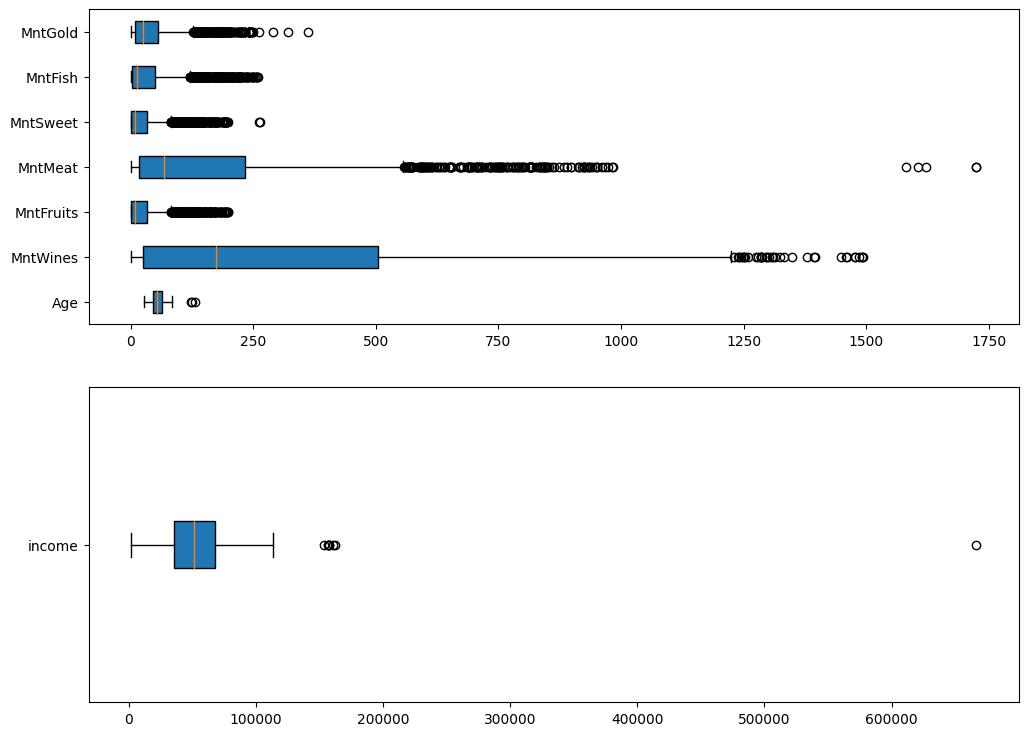

In [16]:
df1 = data[["age", "mntwines", "mntfruits", "mntmeatproducts", "mntsweetproducts", "mntfishproducts", "mntgoldprods"]]
df2 = data["income"]
df3 = data["expenditure"]
fig = plt.figure(figsize =(12, 9))
ax = fig.add_subplot(211)

# Creating boxplot
bp = ax.boxplot(df1, patch_artist=True, vert=0)

# Setting axis names
ax.set_yticklabels(["Age", 'MntWines', 'MntFruits', 'MntMeat',
                     'MntSweet', 'MntFish', 'MntGold'])
ax = fig.add_subplot(212)

# Creating boxplot
bp = ax.boxplot(df2, patch_artist=True, vert=0)

# Setting axis names
ax.set_yticklabels(["income"])

plt.show()


# RFM Analysis

RFM analysis is a marketing analysis tool used to identify a company's best clients based on the nature of their spending habits. The term RFM stands for Recency, Frequency, and Monetary Value. Here’s what each letter represents:

* **Recency**: This refers to how recently a customer has made a purchase. Customers who have made a recent purchase are more likely to make a repeat purchase.

* **Frequency**: This is how often the customer makes purchases. It can help identify repeat customers.

* **Monetary Value**: This refers to how much a customer spends within a given period. It can reveal patterns in consumer behavior, such as customers who don’t purchase items as frequently as others but typically buy the most expensive products when they do.

In [17]:
data['frequency'] = data['numstorepurchases'] + data['numcatalogpurchases'] + data['numwebpurchases']
data.head()

,id,year_birth,education,marital_status,income,kidhome,teenhome,dt_customer,recency,mntwines,mntfruits,mntmeatproducts,mntfishproducts,mntsweetproducts,mntgoldprods,numdealspurchases,numwebpurchases,numcatalogpurchases,numstorepurchases,numwebvisitsmonth,acceptedcmp3,acceptedcmp4,acceptedcmp5,acceptedcmp1,acceptedcmp2,complain,response,expenditure,age,frequency
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,1617,66,22
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,27,69,4
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,776,58,20
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,53,39,6
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,422,42,14


In [18]:
correlation = data.corr(numeric_only=True)
correlation['numwebvisitsmonth'].sort_values(ascending=False)


numwebvisitsmonth      1.000000
kidhome                0.447846
numdealspurchases      0.347633
teenhome               0.134884
year_birth             0.121139
acceptedcmp3           0.061211
complain               0.019769
response              -0.003987
acceptedcmp2          -0.007196
id                    -0.007446
recency               -0.021445
acceptedcmp4          -0.032126
numwebpurchases       -0.055846
age                   -0.121139
acceptedcmp1          -0.192502
mntgoldprods          -0.250719
acceptedcmp5          -0.278113
mntwines              -0.320653
mntfruits             -0.418383
mntsweetproducts      -0.423294
frequency             -0.425939
numstorepurchases     -0.428473
mntfishproducts       -0.446003
expenditure           -0.500218
numcatalogpurchases   -0.520364
mntmeatproducts       -0.539470
income                -0.549202
Name: numwebvisitsmonth, dtype: float64

In [19]:
def classify_correlation(correlation_coefficient):
    if abs(correlation_coefficient) > 0.8:
        return "Strong Positive Correlation" if correlation_coefficient > 0 else "Strong Negative Correlation"
    elif 0.7 <= abs(correlation_coefficient) <= 0.8:
        return "Moderate Positive Correlation" if correlation_coefficient > 0 else "Moderate Negative Correlation"
    elif 0.4 <= abs(correlation_coefficient) < 0.7:
        return "Moderate Positive Correlation" if correlation_coefficient > 0 else "Moderate Negative Correlation"
    elif 0.3 <= abs(correlation_coefficient) < 0.4:
        return "Weak Positive Correlation" if correlation_coefficient > 0 else "Weak Negative Correlation"
    else:
        return "No Significant Correlation"

# Apply the classification function to each row in the DataFrame
correlation['classification'] = correlation['numwebvisitsmonth'].apply(classify_correlation)

correlation[['numwebvisitsmonth','classification']].sort_values(by='numwebvisitsmonth',ascending=False)

,numwebvisitsmonth,classification
numwebvisitsmonth,1.000000,Strong Positive Correlation
kidhome,0.447846,Moderate Positive Correlation
numdealspurchases,0.347633,Weak Positive Correlation
teenhome,0.134884,No Significant Correlation
year_birth,0.121139,No Significant Correlation
acceptedcmp3,0.061211,No Significant Correlation
complain,0.019769,No Significant Correlation
response,-0.003987,No Significant Correlation
acceptedcmp2,-0.007196,No Significant Correlation
id,-0.007446,No Significant Correlation


In [20]:
correlation = correlation.drop(['classification'], axis=1)

<Axes: >

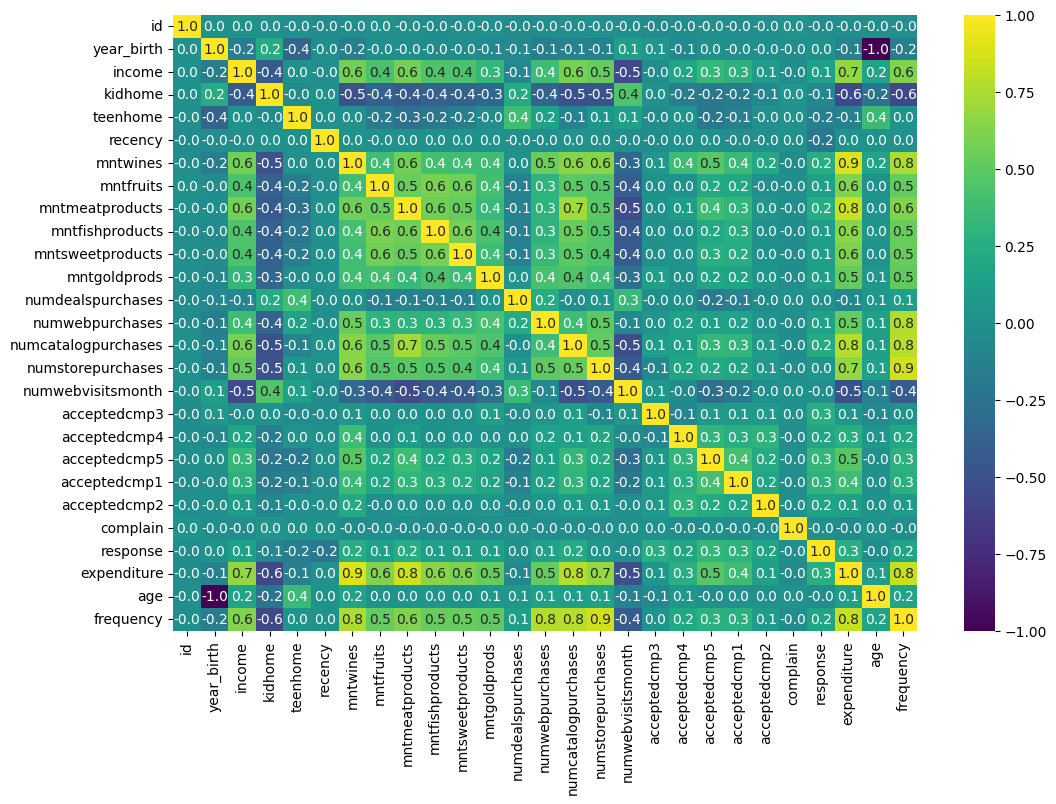

In [21]:
plt.figure(figsize=(12,8))
sns.heatmap(correlation,annot=True,cmap='viridis',fmt=".1f")

In [22]:
data.rename(columns = {'expenditure':'monetary'}, inplace = True)

In [23]:
df_rfm = data[['id','recency','frequency','monetary']]
df_rfm.describe()

,id,recency,frequency,monetary
count,2240.000000,2240.000000,2240.000000,2240.000000
mean,5592.159821,49.109375,12.537054,605.798214
std,3246.662198,28.962453,7.205741,602.249288
min,0.000000,0.000000,0.000000,5.000000
25%,2828.250000,24.000000,6.000000,68.750000
50%,5458.500000,49.000000,12.000000,396.000000
75%,8427.750000,74.000000,18.000000,1045.500000
max,11191.000000,99.000000,32.000000,2525.000000


In [24]:
quantiles_recency = df_rfm.quantile(q = [0.25,0.50,0.75])
quantiles_recency

,id,recency,frequency,monetary
0.25,2828.25,24.0,6.0,68.75
0.50,5458.50,49.0,12.0,396.00
0.75,8427.75,74.0,18.0,1045.50


In [25]:
# Creating functions to determine the RFM score string labels:

def R_score(data):
    if data < quantiles_recency['recency'][0.25]:
        return 4
    elif data < quantiles_recency['recency'][0.50]:
        return 3    
    elif data < quantiles_recency['recency'][0.75]:
        return 2
    else:
        return 1

def F_score(data):
    if data < quantiles_recency['frequency'][0.25]:
        return 1
    elif data < quantiles_recency['frequency'][0.50]:
        return 2    
    elif data < quantiles_recency['frequency'][0.75]:
        return 3
    else:
        return 4    
    
    
def M_score(data):
    if data < quantiles_recency['monetary'][0.25]:
        return 1
    elif data < quantiles_recency['monetary'][0.50]:
        return 2    
    elif data < quantiles_recency['monetary'][0.75]:
        return 3
    else:
        return 4     

In [63]:
# Apply the score functions and store the results directly in the original DataFrame using .loc
df_rfm.loc[:, 'R_score'] = df_rfm['recency'].apply(lambda x: R_score(x))
df_rfm.loc[:, 'F_score'] = df_rfm['frequency'].apply(lambda x: F_score(x))
df_rfm.loc[:, 'M_score'] = df_rfm['monetary'].apply(lambda x: M_score(x))

# Combine the scores into a single column
df_rfm.loc[:, 'rfm_score'] = df_rfm['R_score'] + df_rfm['F_score'] + df_rfm['M_score']

# Display the first few rows of the DataFrame
df_rfm.head()


,id,recency,frequency,monetary,R_score,F_score,M_score,rfm_score
0,5524,58,22,1617,2,4,4,10
1,2174,38,4,27,3,1,1,5
2,4141,26,20,776,3,4,3,10
3,6182,26,6,53,3,2,1,6
4,5324,94,14,422,1,3,3,7


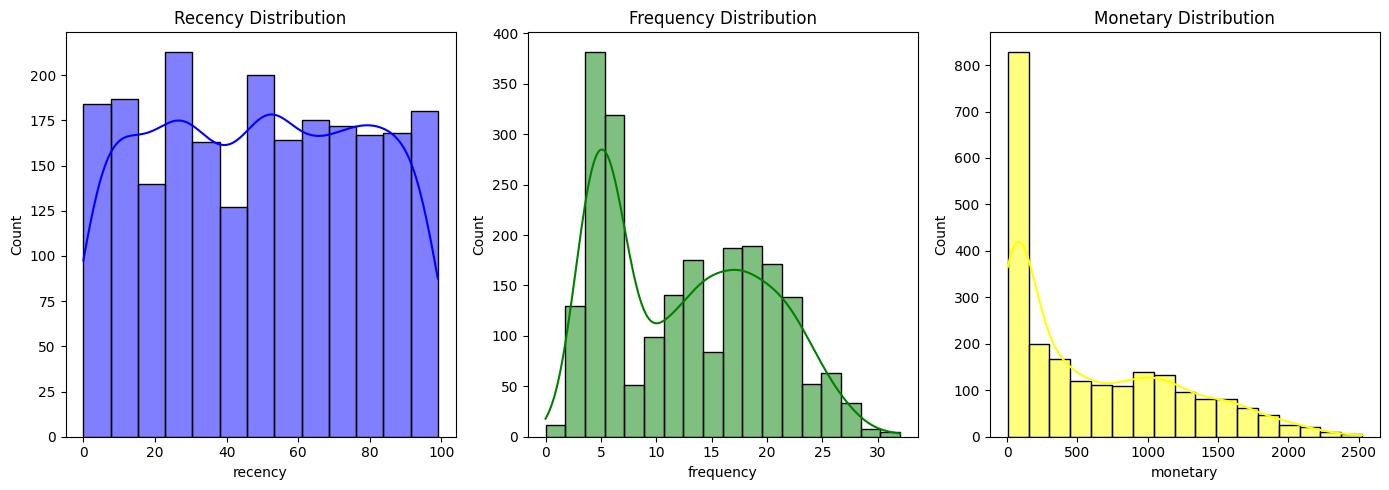

In [27]:
# Create a figure with 1 row and 3 columns
plt.figure(figsize=(14, 5))

# Subplot 1
plt.subplot(1, 3, 1)
sns.histplot(data=df_rfm, x='recency', kde=True, color='blue')
plt.title('Recency Distribution')

# Subplot 2
plt.subplot(1, 3, 2)
sns.histplot(data=df_rfm, x='frequency', kde=True, color='green')
plt.title('Frequency Distribution')

# Subplot 3
plt.subplot(1, 3, 3)
sns.histplot(data=df_rfm, x='monetary', kde=True, color='yellow')
plt.title('Monetary Distribution')

plt.tight_layout()
plt.show()

In [28]:
df_rfm.skew()

id           0.039832
recency     -0.001987
frequency    0.297114
monetary     0.860841
R_score      0.037335
F_score     -0.082051
M_score     -0.002238
rfm_score   -0.091917
dtype: float64

Clearly, the variables 'recency' and 'frequency' are lying between [-0.5, 0.5] indicating that they are symmetric(Normally Distributed). On the other hand, the skewness of the variable 'monetary' is 0.86 indicating the data is highly skewed.

In [29]:
df_log = df_rfm.copy()
df_log['monetary'] = np.log1p(df_log['monetary'])
df_log.head()

,id,recency,frequency,monetary,R_score,F_score,M_score,rfm_score
0,5524,58,22,7.388946,2,4,4,10
1,2174,38,4,3.332205,3,1,1,5
2,4141,26,20,6.655440,3,4,3,10
3,6182,26,6,3.988984,3,2,1,6
4,5324,94,14,6.047372,1,3,3,7


Text(0.5, 1.0, 'After Transformation QQ-Plot')

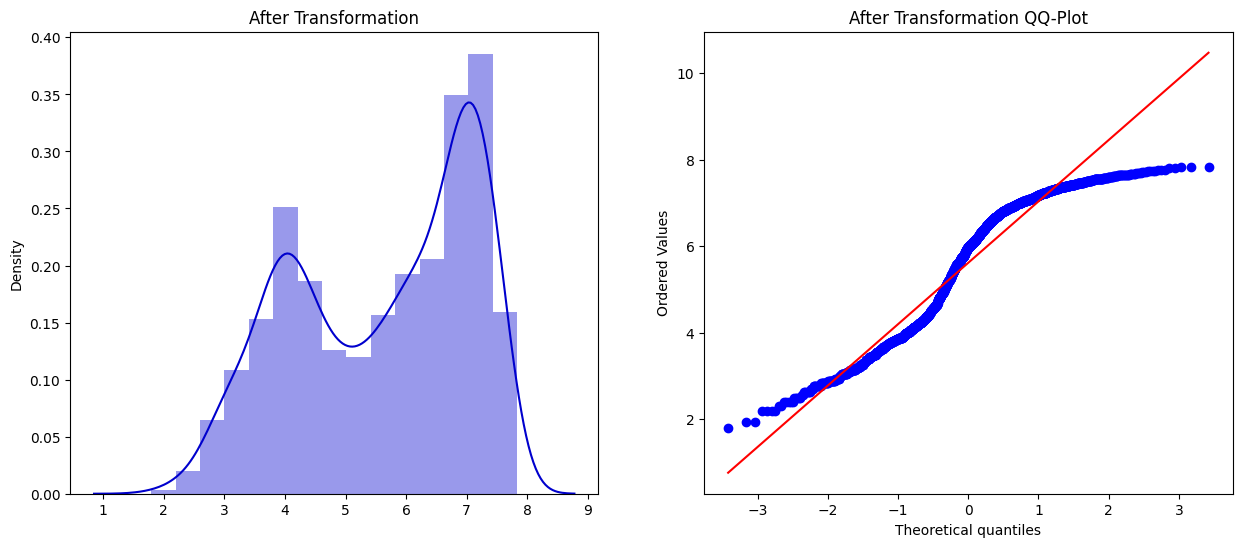

In [30]:
warnings.filterwarnings("ignore")
plt.figure(figsize = (15,6))

plt.subplot(1,2,1)
sns.distplot(x = df_log['monetary'], kde = True, color = "mediumblue")
plt.title('After Transformation')

plt.subplot(1,2,2)
probplot(df_log['monetary'], dist = 'norm', plot=plt)
plt.title("After Transformation QQ-Plot")

# Scaling features in the dataset

In [31]:
# Normalizing the data :
scaler = preprocessing.MinMaxScaler()
df_rfm_norm = pd.DataFrame(scaler.fit_transform(df_log[['recency','frequency','monetary']]))
df_rfm_norm.columns = ['recency','frequency','monetary']

df_rfm_norm.describe()

,recency,frequency,monetary
count,2240.000000,2240.000000,2240.000000
mean,0.496054,0.391783,0.633613
std,0.292550,0.225179,0.243356
min,0.000000,0.000000,0.000000
25%,0.242424,0.187500,0.405972
50%,0.494949,0.375000,0.693767
75%,0.747475,0.562500,0.854172
max,1.000000,1.000000,1.000000


# Model building

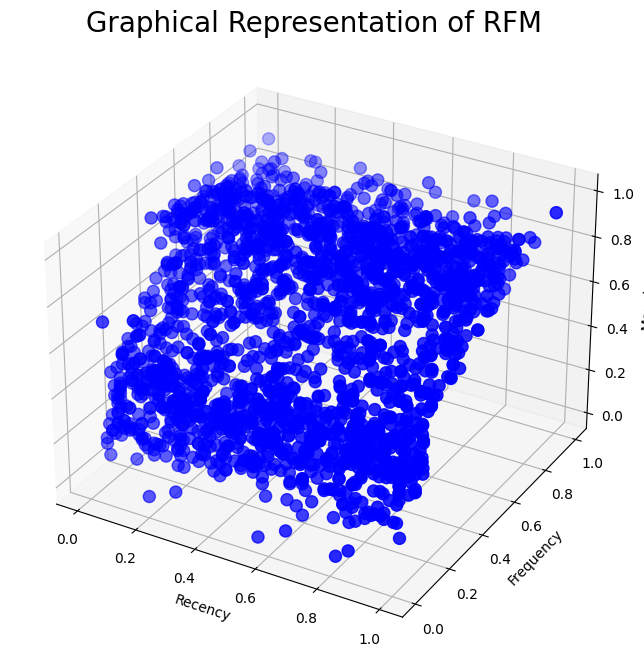

In [32]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(projection='3d')

im = ax.scatter(df_rfm_norm["recency"],df_rfm_norm["frequency"],df_rfm_norm["monetary"],
               color = 'blue',s = 75)       
plt.title('Graphical Representation of RFM ',fontsize = 20)
ax.set_xlabel("Recency")
ax.set_ylabel("Frequency")
ax.set_zlabel("Monetory")
plt.show()

We can observe that the datapoints do not follow any pattern

# K Means

K-means is an unsupervised machine learning algorithm. It partitions a dataset into K clusters, where each data point belongs to the cluster with the nearest mean. The algorithm iteratively assigns points to clusters and recalculates cluster means until cluster assignments no longer change, or a maximum number of iterations is reached.

In [33]:
#Define Kmeans Algorithm and returning the centroids, clusters, inertia :
def Kmeans_algo(data,n):
    """ Function for Kmeans Clustering."""
    
    kmeans_model = KMeans(n_clusters = n, init = 'k-means++', max_iter = 300,
                         random_state = 42, algorithm = 'elkan')
    kmeans_model.fit(data)
    
    #creating centroids:
    centroids = kmeans_model.cluster_centers_
    
    #creating labels:
    labels = kmeans_model.labels_
    df_rfm_norm['label'] = labels
    
    #evaluation metrics:
    inertia = kmeans_model.inertia_
    sil_score = metrics.silhouette_score(data, labels)
    
    return inertia, labels, centroids, sil_score

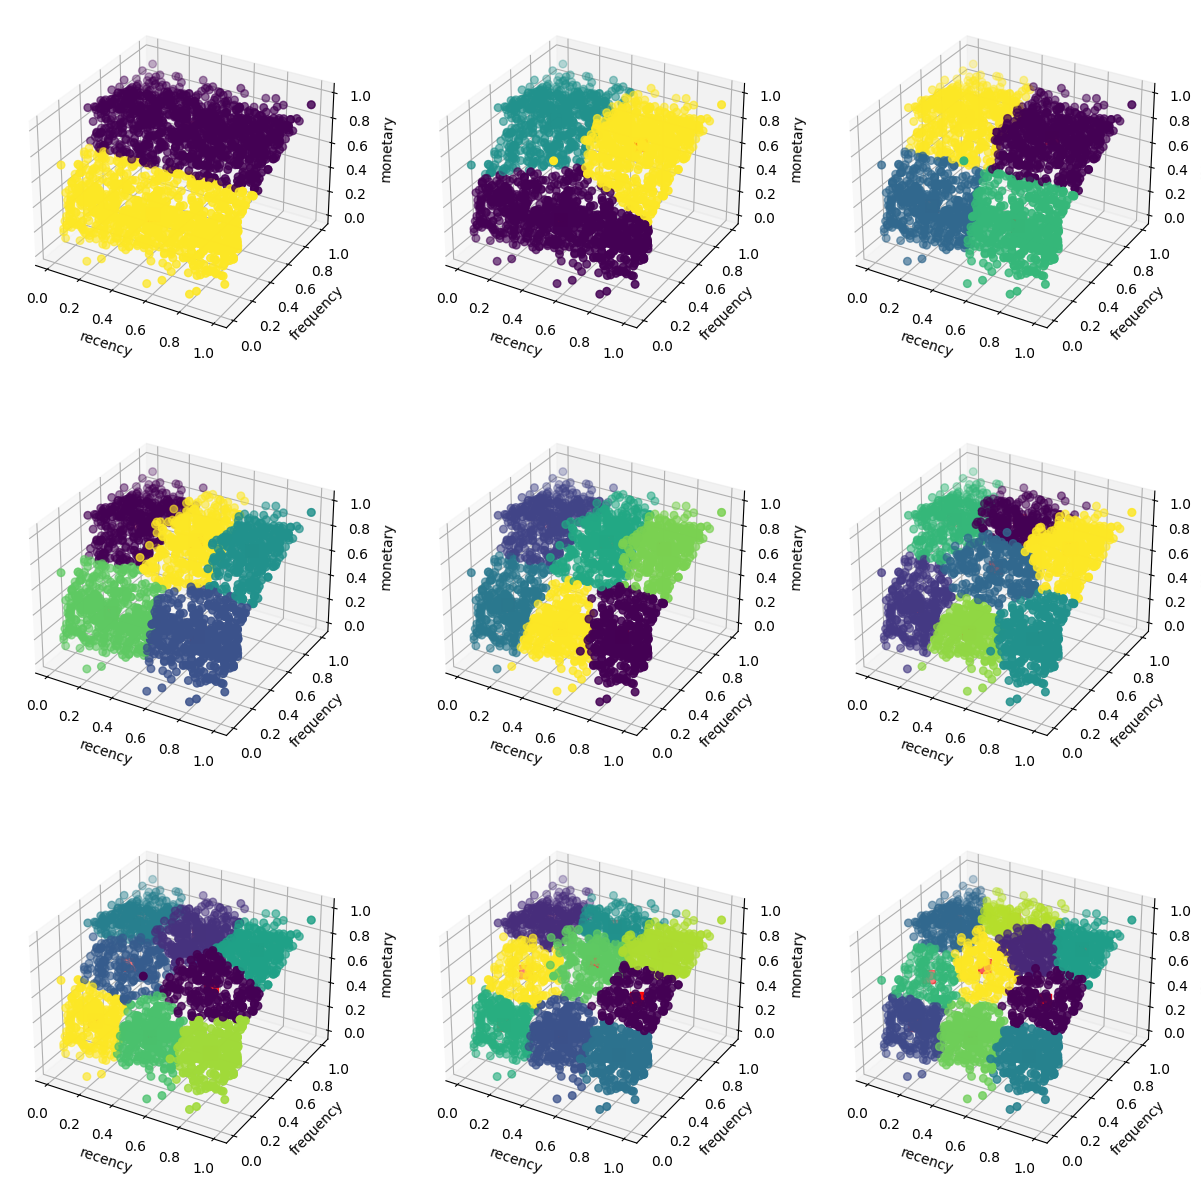

In [34]:
# Create a DataFrame 'x3' with columns 'recency', 'frequency', and 'monetary'
x3 = df_rfm_norm[['recency', 'frequency', 'monetary']]

# Lists to store inertia scores and silhouette scores for different numbers of clusters
x3_inertia_score = []
x3_s_score = []

# Create a figure for subplots
fig = plt.figure(figsize=(15, 15))

# Loop through different numbers of clusters
for i in range(2, 11):
    # Call the KMeans_algo function to perform K-Means clustering
    x3_inertia, x3_labels, x3_centroids, x3_sil_score = Kmeans_algo(x3, i)
    
    # Append inertia and silhouette scores to the respective lists
    x3_inertia_score.append(x3_inertia)
    x3_s_score.append(x3_sil_score)
    
    # Create a DataFrame for centroids
    centroids_df = pd.DataFrame(x3_centroids, columns=['recency', 'frequency', 'monetary'])
    
    # Create a 3D subplot for the current number of clusters
    ax = fig.add_subplot(330 + i - 1, projection='3d')
    
    # Scatter plot of data points colored by cluster labels
    ax.scatter(df_rfm_norm['recency'], df_rfm_norm['frequency'], df_rfm_norm['monetary'],
                s=30, c=df_rfm_norm["label"], cmap="viridis")
    
    # Scatter plot of centroids in red
    ax.scatter(centroids_df['recency'], centroids_df['frequency'], centroids_df['monetary'],
               s=90, marker=",", color="r")
    
    # Set labels for the three axes
    ax.set_xlabel('recency')
    ax.set_ylabel('frequency')
    ax.set_zlabel('monetary')

# End of the loop

# HyperParameter Tuning

Text(0, 0.5, 'Inertia Values')

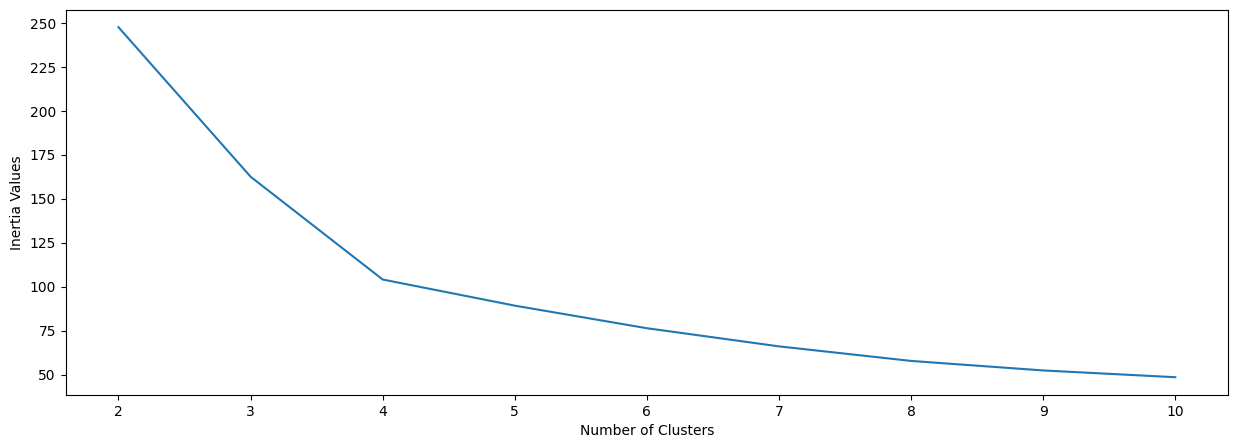

In [35]:
#elbow method:
plt.figure(11, figsize = (15,5))
plt.plot(np.arange(2,11), x3_inertia_score, '-')
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia Values")    

As Plotted, the plot looks like an arm with a clear elbow at k = 4.

Text(0, 0.5, 'Silhouette Score')

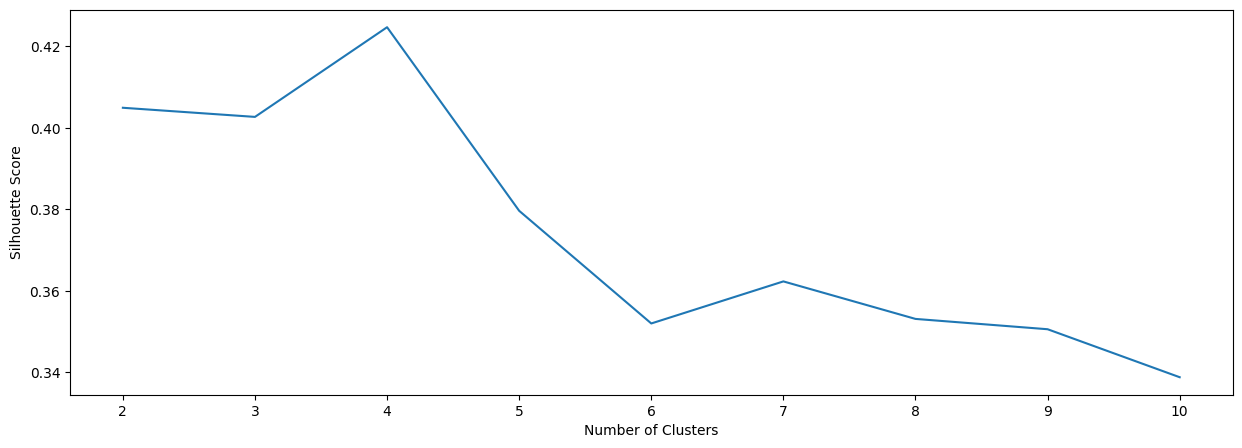

In [36]:
# plot inertia values against number of clusters
plt.figure(11, figsize=(15,5))
plt.plot(np.arange(2,11) , x3_s_score)
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")

From the above graph, there is a clear peak at k = 4. Hence it is optimal.

## Applying fine tuned hyperparameters algorithm

In [37]:
d1 = df_rfm_norm[['recency','frequency','monetary']]
model1 = KMeans(n_clusters = 4, max_iter = 400, random_state = 42)
model1.fit(d1)
d1['labels'] = model1.labels_

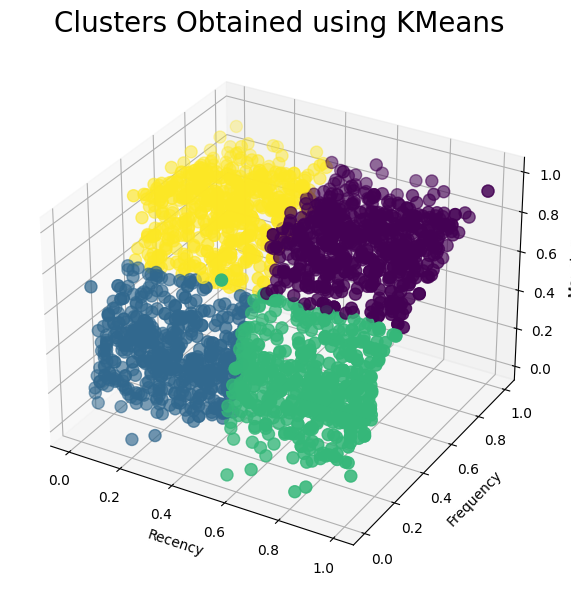

In [38]:
fig = plt.figure(figsize = (10,7))
ax = fig.add_subplot(projection='3d')

ax.scatter(d1["recency"], d1["frequency"], d1["monetary"],
               c = model1.labels_ , cmap = "viridis" ,s = 75)       
plt.title('Clusters Obtained using KMeans',fontsize = 20)
ax.set_xlabel("Recency")
ax.set_ylabel("Frequency")
ax.set_zlabel("Monetory")
plt.show()

In [39]:
score1 = metrics.silhouette_score(d1[['recency','frequency','monetary']], model1.labels_, metric='euclidean')
c1 = metrics.calinski_harabasz_score(d1[['recency','frequency','monetary']], model1.labels_)

# DBSCAN Algorithm

DBSCAN (Density-Based Spatial Clustering of Applications with Noise) is a clustering algorithm that identifies clusters in data based on point density. It groups data points that are closely packed, distinguishing between core points (dense areas), border points (on the edge of clusters), and noise points (outliers). DBSCAN is effective for discovering clusters of arbitrary shapes and sizes, making it useful in various data analysis applications.

In [40]:
df_rfm_dbscan = df_rfm_norm[['recency','frequency','monetary']]
df_rfm_dbscan.head()

,recency,frequency,monetary
0,0.585859,0.6875,0.926283
1,0.383838,0.1250,0.254929
2,0.262626,0.6250,0.804894
3,0.262626,0.1875,0.363620
4,0.949495,0.4375,0.704265


# Hyperparameter tuning

In [41]:
Mnt_pnts = len(df_rfm_dbscan.columns)*2
print('The Minimum Points under Consideration is :', Mnt_pnts)

The Minimum Points under Consideration is : 6


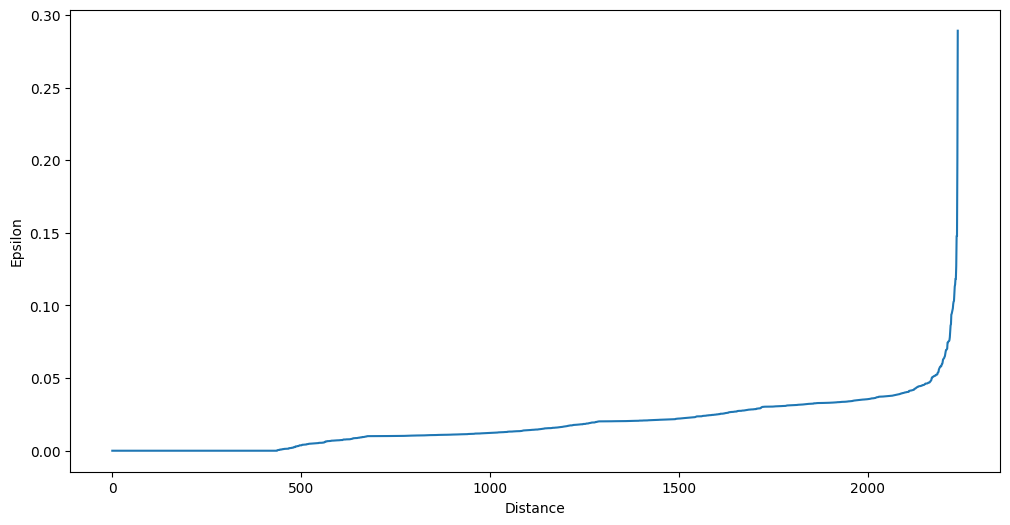

In [42]:
# Determining the best value for Epsilon

# Firstly, finding average distance using KNN:
neighbours = NearestNeighbors(n_neighbors = Mnt_pnts)
knn_data = neighbours.fit(df_rfm_dbscan)

#Obtaining indices and distances :
distances, indices = knn_data.kneighbors(df_rfm_dbscan)

#Sorting the distance:
sorting_distance = np.sort(distances, axis = 0)

#sorted distance
sorted_distance = sorting_distance[:,1]

#plotting between epsilon and distance
plt.figure(figsize = (12,6))
plt.plot(sorted_distance)
plt.xlabel('Distance')
plt.ylabel('Epsilon')
plt.show()

The ideal value chose for Epsilon will be 0.120


## Applying fine tuned hyperparameters algorithm

In [43]:
# Creating a dataframe and using DBSCAN algorithm:
x1 = df_rfm_dbscan[['recency','frequency','monetary']]
dbscan_model = DBSCAN(eps = 0.120, min_samples = Mnt_pnts).fit(df_rfm_dbscan)
df_rfm_dbscan['labels'] = dbscan_model.labels_
print('The Number of Clusters Obtained will be :')
print(df_rfm_dbscan['labels'].value_counts())

#calculating Silhoutte Score:
print("")
score = metrics.silhouette_score(x1, dbscan_model.labels_)
print("The Silhoutte Score is:", score)

The Number of Clusters Obtained will be :
labels
 0    2228
-1      12
Name: count, dtype: int64

The Silhoutte Score is: 0.25420216782943056


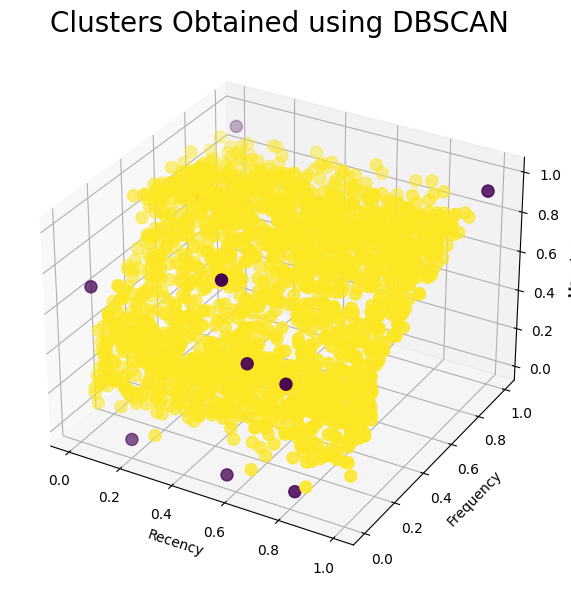

In [44]:
#plotting :
fig = plt.figure(figsize = (10,7))
ax = fig.add_subplot(projection='3d')

ax.scatter(df_rfm_dbscan["recency"],df_rfm_dbscan["frequency"],df_rfm_dbscan["monetary"],
               c = df_rfm_dbscan["labels"] , cmap ="viridis",s = 75)       
plt.title('Clusters Obtained using DBSCAN',fontsize = 20)
ax.set_xlabel("Recency")
ax.set_ylabel("Frequency")
ax.set_zlabel("Monetory")
plt.show()

In [45]:
d2 = df_rfm_dbscan[['recency','frequency','monetary']]
model2 = DBSCAN(eps = 0.120, min_samples = Mnt_pnts)
model2.fit(d2)

DBSCAN(eps=0.12, min_samples=6)

In [46]:
score2 = metrics.silhouette_score(d2, model2.labels_, metric='euclidean')
c2 = metrics.calinski_harabasz_score(d2, model2.labels_)

# Agglomerative Hierarchical clustering

Data clustering technique that builds a hierarchical structure of clusters by iteratively merging data points or clusters based on their proximity. It doesn't require specifying the number of clusters in advance and can be visualized using a dendrogram. It's versatile but computationally intensive for large datasets, making it useful for exploring hierarchical relationships and finding clusters of varying sizes in data.

In [47]:
df_rfm_agglo = df_rfm_norm[['recency','frequency','monetary']]
df_rfm_agglo.head()

,recency,frequency,monetary
0,0.585859,0.6875,0.926283
1,0.383838,0.1250,0.254929
2,0.262626,0.6250,0.804894
3,0.262626,0.1875,0.363620
4,0.949495,0.4375,0.704265


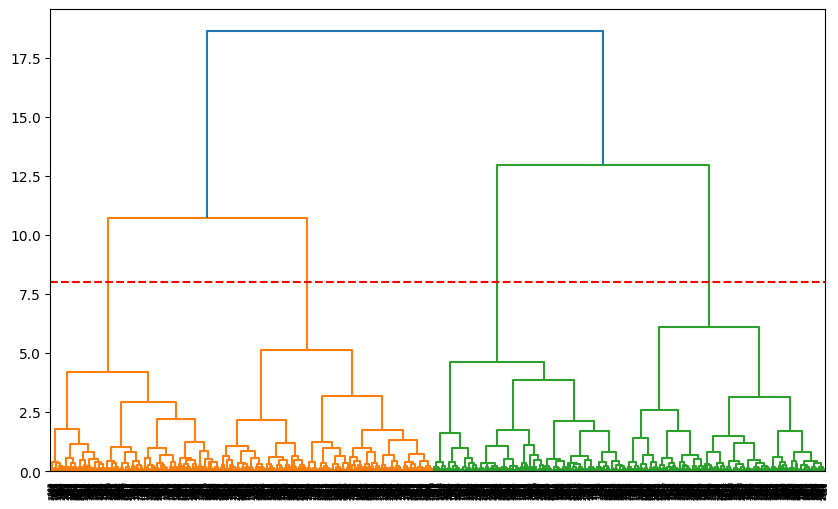

In [48]:
# Determining the number of Clusters

plt.figure(figsize = (10,6))
shc.dendrogram(shc.linkage(df_rfm_agglo, method='ward'))
plt.axhline(y = 8, color='r', linestyle='--')
plt.show()

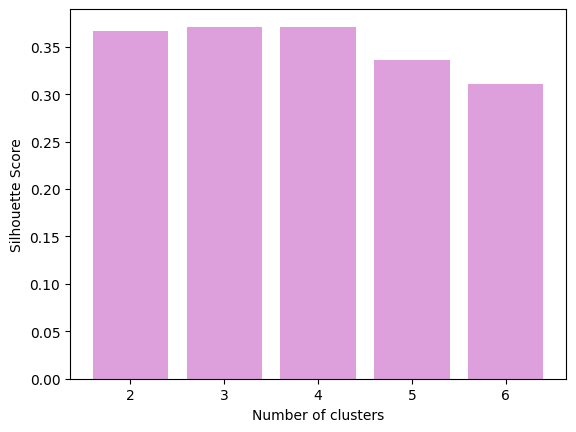

[0.36606895363675535,
 0.3703839371048314,
 0.37109345979514025,
 0.3361679736958965,
 0.3102847567833636]

In [49]:
# Validation on the Number of Clusters Chose by Silhouette Method:
agglo_s_score = []
x1 = df_rfm_agglo[['recency','frequency','monetary']]

for n_cluster in range(2,7):
    agglo_s_score.append(metrics.silhouette_score(x1, AgglomerativeClustering(n_clusters = n_cluster).fit_predict(x1))) 
    
    
k = [2, 3, 4, 5, 6] 
plt.bar(k,agglo_s_score, color = 'plum' ) 
plt.xlabel('Number of clusters', fontsize = 10) 
plt.ylabel('Silhouette Score', fontsize = 10) 
plt.show()

agglo_s_score

The number of clusters to be chosen is 4



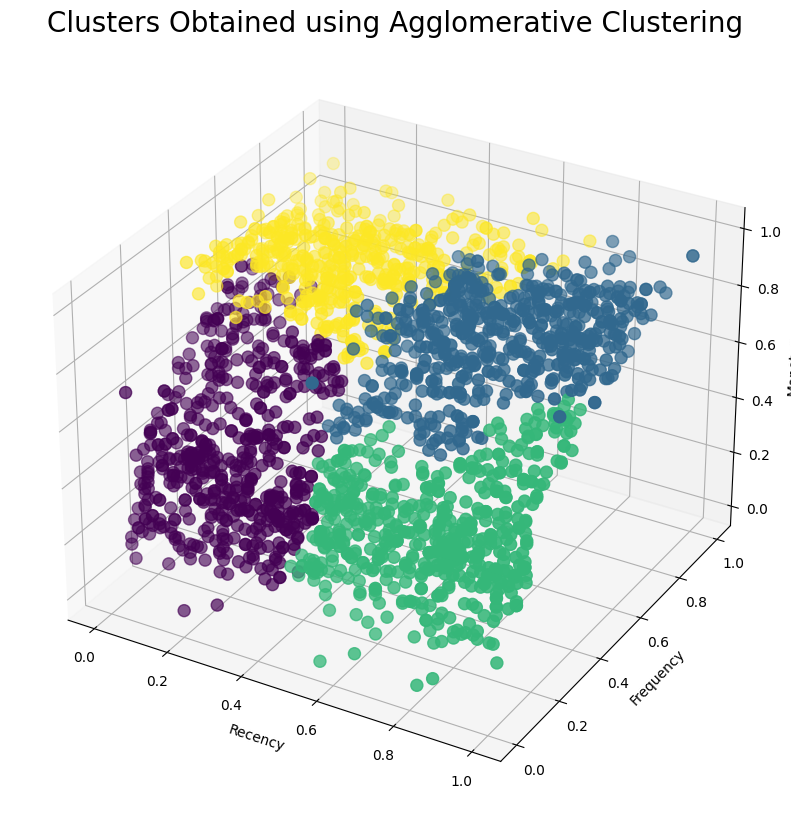

In [50]:
# Applying the Updated Algorithm
x1 = df_rfm_agglo[['recency','frequency','monetary']]


agglo_hier_model = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward') 
agglo_hier_model.fit(df_rfm_agglo)
df_rfm_agglo['labels'] = agglo_hier_model.labels_

fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(projection = '3d')
ax.scatter(df_rfm_agglo["recency"],df_rfm_agglo["frequency"],df_rfm_agglo["monetary"],
               c = df_rfm_agglo['labels'], cmap ="viridis",s = 75) 

plt.title('Clusters Obtained using Agglomerative Clustering',fontsize = 20)
ax.set_xlabel("Recency")
ax.set_ylabel("Frequency")
ax.set_zlabel("Monetory")
plt.show()

In [51]:
d3 = df_rfm_agglo[['recency','frequency','monetary']]
model3 = AgglomerativeClustering(n_clusters = 4, affinity='euclidean', linkage='ward') 
model3.fit(d3)

AgglomerativeClustering(affinity='euclidean', n_clusters=4)

In [52]:
score3 = metrics.silhouette_score(d3, model3.labels_, metric='euclidean')
c3 = metrics.calinski_harabasz_score(d3, model3.labels_)

# Validation of the Clustering Algorithms

In [53]:
#dataframe of Silhoutte Score:
validation_df = pd.DataFrame({'Algorithms': ['KMeans','DBSCAN',"Agglomerative Clustering"],
                              "Silhouette Score": [score1, score2, score3]})

# dataframe of calinski:
validation_df_cal = pd.DataFrame({'Algorithms': ['KMeans','DBSCAN',"Agglomerative Clustering"],
                              "Calinski Score": [c1,c2,c3]})

In [54]:
print(validation_df)

                 Algorithms  Silhouette Score
0                    KMeans          0.424700
1                    DBSCAN          0.254202
2  Agglomerative Clustering          0.371093


In [55]:
print(validation_df_cal)

                 Algorithms  Calinski Score
0                    KMeans     2391.357568
1                    DBSCAN        0.328990
2  Agglomerative Clustering     1919.845484


<Axes: xlabel='Algorithms', ylabel='Calinski Score'>

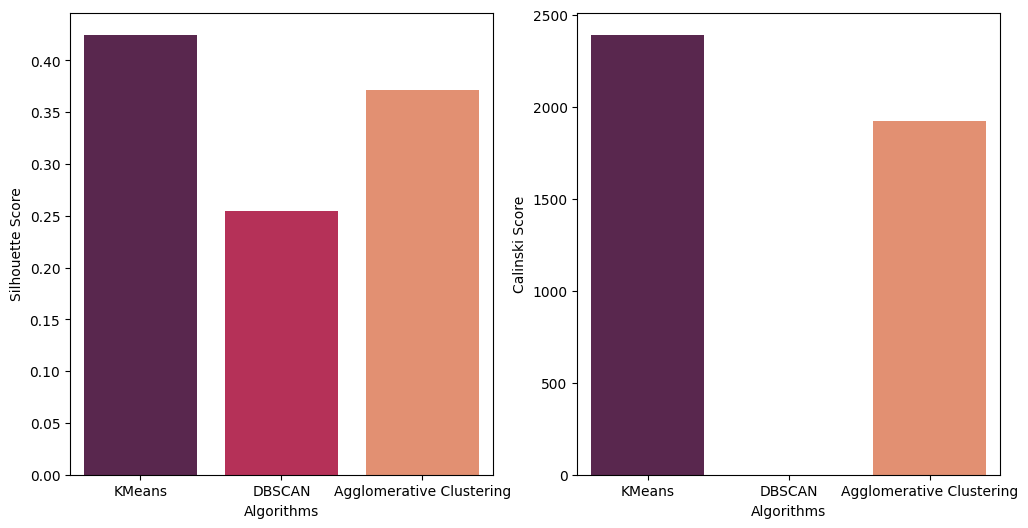

In [56]:
plt.figure(figsize = (12,6))

plt.subplot(1,2,1)
sns.barplot(x = validation_df['Algorithms'], y = validation_df['Silhouette Score'], 
              palette = 'rocket')

plt.subplot(1,2,2)
sns.barplot(x = validation_df_cal['Algorithms'], y = validation_df_cal['Calinski Score'], 
              palette = 'rocket')

# Conclusion

We choose KMeans Algorithm because it scored higher than the other models.

In [57]:
df_rfm

,id,recency,frequency,monetary,R_score,F_score,M_score,rfm_score
0,5524,58,22,1617,2,4,4,10
1,2174,38,4,27,3,1,1,5
2,4141,26,20,776,3,4,3,10
3,6182,26,6,53,3,2,1,6
4,5324,94,14,422,1,3,3,7
...,...,...,...,...,...,...,...,...
2235,10870,46,16,1341,3,3,4,10
2236,4001,56,15,444,2,3,3,8
2237,7270,91,18,1241,1,4,4,9
2238,8235,8,21,843,4,4,3,11


In [58]:
df1 = pd.DataFrame(df_rfm[['id','recency','frequency','monetary','rfm_score']])
df2 = pd.DataFrame(d1['labels'])

final_df = pd.concat([df1,df2], axis = 1)
final_df.head()

,id,recency,frequency,monetary,rfm_score,labels
0,5524,58,22,1617,10,0
1,2174,38,4,27,5,1
2,4141,26,20,776,10,3
3,6182,26,6,53,6,1
4,5324,94,14,422,7,0


In [59]:
temp = df_rfm[['id','R_score','F_score','M_score','rfm_score']]
temp2 = final_df[['id','labels']]

ml_model_clusters = data.merge(temp, on='id', how='inner')

# Define age bins and labels
age_bins = [0, 18, 30, 50, 200]  # Define your age groups as needed
age_labels = ['0-18', '19-30', '31-50', '51+']  # Labels for the age groups

# Create the 'age_group' column
ml_model_clusters['age_group'] = pd.cut(ml_model_clusters['age'], bins=age_bins, labels=age_labels)

# Define income bins and labels
income_bins = [0, 25000, 50000, 75000, 1000000]  # Define your age groups as needed
income_labels = ['0-25k', '25k-50k', '50k-75k', '75k+']  # Labels for the age groups

# Create the 'income_group' column
ml_model_clusters['income_group'] = pd.cut(ml_model_clusters['income'], bins=income_bins, labels=income_labels)

# Define numwebvisitsmonth bins and labels
numwebvisitsmonth_bins = [0, 3, 6, 9, 30]  # Define your age groups as needed
numwebvisitsmonth_labels = ['0-3', '3-6', '6-9', '9+']  # Labels for the age groups

# Create the 'income_group' column
ml_model_clusters['numwebvisitsmonth_group'] = pd.cut(ml_model_clusters['numwebvisitsmonth'], bins=numwebvisitsmonth_bins, labels=numwebvisitsmonth_labels)

ml_model_clusters.head()


,id,year_birth,education,marital_status,income,kidhome,teenhome,dt_customer,recency,mntwines,mntfruits,mntmeatproducts,mntfishproducts,mntsweetproducts,mntgoldprods,numdealspurchases,numwebpurchases,numcatalogpurchases,numstorepurchases,numwebvisitsmonth,acceptedcmp3,acceptedcmp4,acceptedcmp5,acceptedcmp1,acceptedcmp2,complain,response,monetary,age,frequency,R_score,F_score,M_score,rfm_score,age_group,income_group,numwebvisitsmonth_group
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,1617,66,22,2,4,4,10,51+,50k-75k,6-9
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,27,69,4,3,1,1,5,51+,25k-50k,3-6
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,776,58,20,3,4,3,10,51+,50k-75k,3-6
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,53,39,6,3,2,1,6,31-50,25k-50k,3-6
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,422,42,14,1,3,3,7,31-50,50k-75k,3-6


In [60]:
ml_model_clusters = ml_model_clusters.merge(temp2, on='id', how='inner')

ml_model_clusters.to_csv('ml_clusters.csv', index=False)
ml_model_clusters

,id,year_birth,education,marital_status,income,kidhome,teenhome,dt_customer,recency,mntwines,mntfruits,mntmeatproducts,mntfishproducts,mntsweetproducts,mntgoldprods,numdealspurchases,numwebpurchases,numcatalogpurchases,...,acceptedcmp3,acceptedcmp4,acceptedcmp5,acceptedcmp1,acceptedcmp2,complain,response,monetary,age,frequency,R_score,F_score,M_score,rfm_score,age_group,income_group,numwebvisitsmonth_group,labels
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,...,0,0,0,0,0,0,1,1617,66,22,2,4,4,10,51+,50k-75k,6-9,0
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,...,0,0,0,0,0,0,0,27,69,4,3,1,1,5,51+,25k-50k,3-6,1
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,...,0,0,0,0,0,0,0,776,58,20,3,4,3,10,51+,50k-75k,3-6,3
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,...,0,0,0,0,0,0,0,53,39,6,3,2,1,6,31-50,25k-50k,3-6,1
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,...,0,0,0,0,0,0,0,422,42,14,1,3,3,7,31-50,50k-75k,3-6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,43,182,42,118,247,2,9,3,...,0,0,0,0,0,0,0,1341,56,16,3,3,4,10,51+,50k-75k,3-6,3
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,0,30,0,0,8,7,8,2,...,0,0,0,1,0,0,0,444,77,15,2,3,3,8,51+,50k-75k,6-9,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,48,217,32,12,24,1,2,3,...,0,1,0,0,0,0,0,1241,42,18,1,4,4,9,31-50,50k-75k,3-6,0
2238,8235,1956,Masters,Together,69245.0,0,1,2014-01-24,8,428,30,214,80,30,61,2,6,5,...,0,0,0,0,0,0,0,843,67,21,4,4,3,11,51+,50k-75k,0-3,3


In [61]:
# List of columns to group by
grouping_columns = ['age_group', 'education', 'marital_status', 'income_group', 'kidhome', 'teenhome','numwebvisitsmonth_group']

# Initialize an ExcelWriter object to save multiple sheets
with pd.ExcelWriter('unused_attributes_mean_rfm_score.xlsx', engine='xlsxwriter') as writer:
    for column in grouping_columns:
        grouped_data = ml_model_clusters.groupby(['labels', column])['rfm_score'].mean().reset_index()
        # Write each DataFrame to a different sheet
        grouped_data.to_excel(writer, sheet_name=column, index=False)

# Save the Excel file with multiple sheets
print("Excel file 'unused_attributes_mean_rfm_score.xlsx' with multiple sheets has been created.")


Excel file 'unused_attributes_mean_rfm_score.xlsx' with multiple sheets has been created.


## Grouping Clusters

In [62]:
# Initialize an empty dictionary to store cluster means
cluster_means = {}

# Define the number of clusters (update this based on your actual number of clusters)
num_clusters = 4

# Calculate the mean RFM score for each cluster
for cluster_label in range(num_clusters):
    cluster_df = final_df[final_df['labels'] == cluster_label].reset_index()
    mean_rfm_score = cluster_df['rfm_score'].mean()
    cluster_means[cluster_label] = mean_rfm_score

# Sort the clusters by mean RFM score in descending order
sorted_clusters = sorted(cluster_means.items(), key=lambda x: x[1], reverse=True)

# Print the clusters with their mean RFM scores
for cluster_label, mean_score in sorted_clusters:
    print(f"Cluster {cluster_label}: Mean RFM Score = {mean_score}")


Cluster 3: Mean RFM Score = 10.306779661016948
Cluster 0: Mean RFM Score = 8.507911392405063
Cluster 1: Mean RFM Score = 6.284023668639053
Cluster 2: Mean RFM Score = 4.457925636007828



In RFM (Recency, Frequency, Monetary) analysis, a higher RFM score typically indicates a more engaged and valuable customer. Let's interpret the clusters based on their mean RFM scores:

* Cluster 3: Mean RFM Score = 10.307

Interpretation: This cluster has the highest mean RFM score, suggesting that customers in this cluster are the most engaged and valuable.
Traits: Customers in this cluster are likely very recent buyers (low recency), frequent purchasers (high frequency), and high spenders (high monetary value). They are the most loyal and actively engaged with your business. They are less likely to churn.

* Cluster 0: Mean RFM Score = 8.508

Interpretation: This cluster has the second-highest mean RFM score, indicating that customers in this cluster are also highly engaged and valuable.
Traits: Customers in this cluster are recent buyers (moderate recency), frequent purchasers (high frequency), and above-average spenders (moderate to high monetary value). They are loyal but may not be as recent as Cluster 3. They are less likely to churn.

* Cluster 1: Mean RFM Score = 6.284

Interpretation: This cluster has a moderate mean RFM score, suggesting that customers in this cluster have moderate engagement and value.
Traits: Customers in this cluster are somewhat recent buyers (moderate recency), have a moderate purchase frequency, and their monetary value is moderate. They are engaged but not as much as Clusters 0 and 3. They are somewhat likely to churn, but with the right retention strategies, they can be retained.

* Cluster 2: Mean RFM Score = 4.458

Interpretation: This cluster has the lowest mean RFM score, indicating that customers in this cluster are the least engaged and valuable.
Traits: Customers in this cluster are less recent buyers (higher recency), infrequent purchasers (lower frequency), and have lower monetary value. They are less loyal and more likely to churn if not engaged effectively.
In summary, Cluster 3 is the most loyal and engaged cluster, while Cluster 2 is the least engaged and more likely to churn. Clusters 0 and 1 fall in between, with Cluster 0 being more loyal and engaged than Cluster 1. To retain and maximize the value of each cluster, tailor your marketing and retention strategies accordingly. For example, focus on re-engagement efforts for Cluster 2 and strengthen loyalty programs for Cluster 0 and 3.